In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv


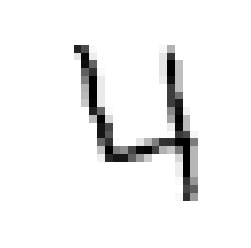

[[1626    0    2    2    0    0    8    0    3    2]
 [   0 1896    4    0    2    0    1    2    1    2]
 [   4    6 1594    7    0    3    6   14    8    3]
 [   1    1    9 1657    0   19    3    8   21    3]
 [   1    5    9    0 1599    0    2    8    2   29]
 [   2    1    2   17    1 1449   16    5   12   11]
 [   5    5    2    0    1    6 1621    0    0    0]
 [   0   16    5    3    5    0    0 1674    1   42]
 [   4   12    8   19    4   26    3    7 1555   12]
 [   9    2    1    7   30    2    0   52    9 1563]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1643
           1       0.98      0.99      0.98      1908
           2       0.97      0.97      0.97      1645
           3       0.97      0.96      0.97      1722
           4       0.97      0.97      0.97      1655
           5       0.96      0.96      0.96      1516
           6       0.98      0.99      0.98      1640
           7       0.95      0.96   

In [2]:
import pandas as pd
mnist_ds = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X = mnist_ds.drop(columns=["label"])
y = mnist_ds["label"]

#perform data augumentation - shift all images by one pixel
X_2 = X.shift(periods=1, axis='columns', fill_value=0)
X = X.append(X_2)
y = y.append(y)


import matplotlib as mpl
import matplotlib.pyplot as plt

X_np = X.to_numpy()
some_digit = X_np[3]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

# y is stored as a string -- convert to integer
y = y.astype(np.uint8)



from sklearn.preprocessing import StandardScaler
X_np = StandardScaler().fit_transform(X_np)

from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
pca.fit(X_np)
X_np = pca.transform(X_np) 

# # split the set between train and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, y, test_size=0.2, random_state=42, shuffle=True)

# from sklearn.model_selection import GridSearchCV
# classifier = KNeighborsClassifier()
# param_grid = {'n_neighbors': [5, 10], 'weights':['distance'], 'metric':['euclidean']}
# gs = GridSearchCV(classifier, param_grid, verbose=1, cv=3, n_jobs=-1)
# gs.fit(X_train, y_train)
# print(gs.best_params_)
# y_pred = gs.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
#use weights parameters to increase performance
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
